# Substack Visualizations - First Draft


In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/home/cjrisi/Projects/bg_control/eda') # Need to add this to the path so that the script can be imported
from visualizations import andrew_y, anton_r, gavin_k, jonathan_g, julia_z, junwon_p, rebecca_m, safiya_m, sneha_s, tony_c, vilohith_r, yimeng_x

df_500030 = pd.read_csv('../data/500030_2024-07-01_2024-09-30.csv')
df_500030['patient_id'] = 500030

df_679372 = pd.read_csv('../data/679372_2024-07-01_2024-09-30.csv')
df_679372['patient_id'] = 679372

df = pd.concat([df_500030, df_679372])
df['interval'] = df['date'].apply(lambda x: x[27:29]) # trimming the head
df['date'] = df['date'].apply(lambda x: x[:19]) # trimming the tail
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

/tmp/ipykernel_111261/737988673.py:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_679372 = pd.read_csv('../data/679372_2024-07-01_2024-09-30.csv')


## Visualizations

### Andrew Y

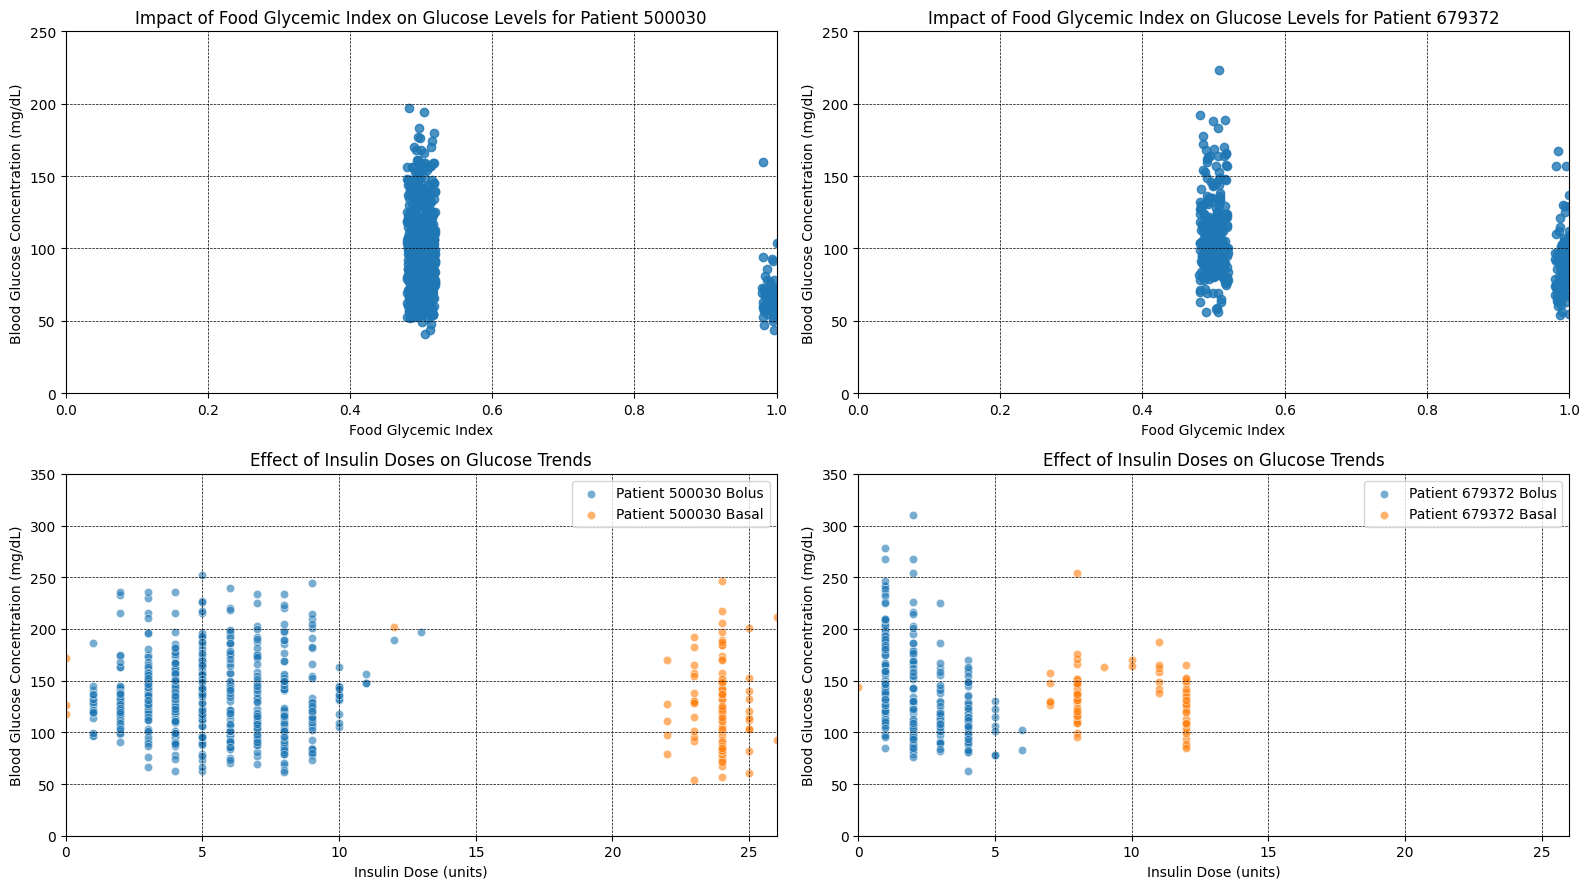

In [2]:
andrew_y(df)

**Notes:** We have made some improvements to the original plots to better convey information. 

1. We have added jitter to the glycemic index plots, this allows us to better understand where teh data is clustering. We should probably also add a line that indicates the median or even better, try this with violin or box plots. 
2. If you're going to plot two patients on the same plot, make sure you have very good reason to do so. 
3. When comparing two individuals with two different plots, make sure the axes are the same dimensions! It's hard to understand the differences in the data when the each axis isn't showing the same information.
4. Whenever you plot something and see the non-random separation of data, investigate this further, there could be extra valuable information that you aren't including. In this case it was the difference between a bolus and a basal insulin dose. 
5. We're working with data that comes in many different units, always add things like (mg/dL) or (mmol/L)


What other improvements could we make to these plots? 

TypeError: 'Axes' object is not iterable

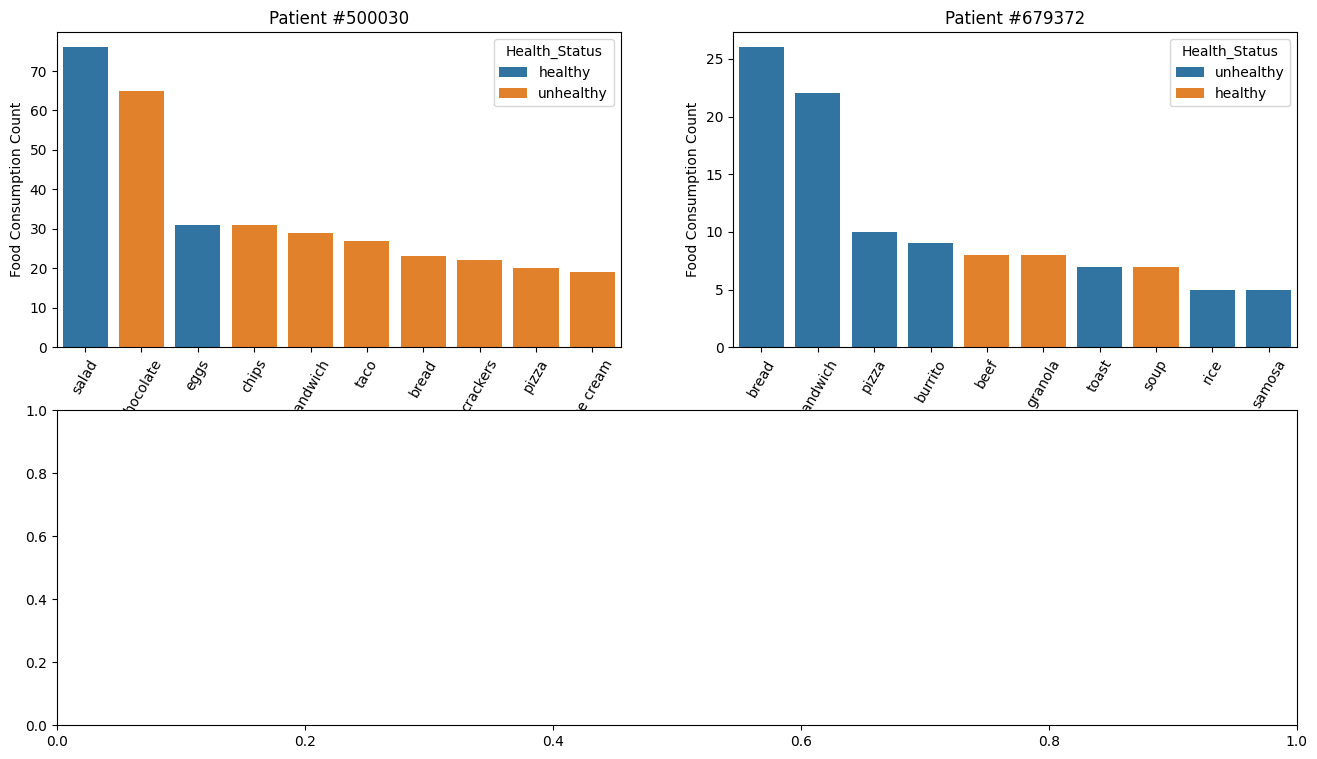

In [3]:
anton_r(df)


**Notes:** We have made some improvements to the original plots to better convey information. 

1. The colours are no longer red and green! The issue with red and green is that it's the most common form of colour blindness and makes your plots inaccessible to many people. Orange and blue tends to be a better habit for data display. It is also more attention grabbing to humans!
2. Avoid pie charts unless you have very good reason to use them. Pie charts are less immediately interpretable from the visualization alone. Any pie chart is just a stacked bar chart spun into a circle. You're better off creating a stacked bar chart with labelled axis.

In [8]:
gavin_k(df_500030, df_679372)


TypeError: gavin_k() takes 0 positional arguments but 2 were given

In [ ]:
jonathan_g(df_500030, df_679372)


In [ ]:
julia_z(df_500030, df_679372)


In [ ]:
junwon_p(df_500030, df_679372)


In [ ]:
rebecca_m(df_500030, df_679372)


In [ ]:
safiya_m(df_500030, df_679372)


In [ ]:
sneha_s(df_500030, df_679372)


In [ ]:
tony_c(df_500030, df_679372)


In [ ]:
vilohith_r(df_500030, df_679372)


In [ ]:
yimeng_x(df_500030, df_679372)
